# Progetto di Business Intelligence per i Servizi Finanziari

Jupyter Notebook relativo alle parti di codice python utilizzate per il progetto.

## 0. Requisiti necessari per questo playbook

è necessario avere python versione $\ge$ 3.8, inoltre sono necesarie le seguenti librerie:

- **pandas**
- **numpy**
- **yfinance**
- **matplotlib**
- **seaborn**
- **scipy**

possono essere installate con i seguenti comandi:
```
pip install pandas
pip install numpy
pip install yfinance
pip install matplotlib
pip install seaborn
pip install scipy
```

## 1. Titoli utilizzati in questo progetto
Sono utilizzati i seguenti titoli:

- Meta Platforms, Inc. (**FB**)
- Alphabet Inc. (**GOOG**)
- Raytheon Technologies Corporation (**RTX**)
- Lockheed Martin Corporation (**LMT**)
- Bank of America Corporation (**BAC**)
- JPMorgan Chase & Co. (**JPM**)

Importiamo ora i titoli direttamente da Yahoo Finance

In [1]:
# Import delle librerie principali utilizzate per il download dei dati e la loro rappresentazione
import pandas as pd
import numpy as np
import yfinance as yf # per effettuare il download diretto da yahoo finance
import matplotlib.pyplot as plt # per il plot dei grafici
import seaborn as sns # heatmaps

# Download dei dati per ogni titolo utilizzato
## titoli tecnologici
fb_df = yf.download('FB', start='2011-11-30', end='2021-11-30')
goog_df = yf.download('GOOG', start='2011-11-30', end='2021-11-30')
## titoli militari
rtx_df = yf.download('RTX', start='2011-11-30', end='2021-11-30')
lmt_df = yf.download('LMT', start='2011-11-30', end='2021-11-30')
## titoli bancari
bac_df = yf.download('BAC', start='2011-11-30', end='2021-11-30')
jpm_df = yf.download('JPM', start='2011-11-30', end='2021-11-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Effetuiamo ora la fusione dei dati in un solo DataFrame e visualiziamo i primi 10 dati in tabella

In [2]:
# Creazione del dataframe di pandas
adj_close_tot = pd.DataFrame()

# popolazione del dataframe con i dati presi da yahoo finance
adj_close_tot["Meta Price"] = fb_df[["Adj Close"]] # NOTA: quotata in borsa da 18-05-2012
adj_close_tot["Alphabet Price"] = goog_df[["Adj Close"]]
adj_close_tot["Raytheon Price"] = rtx_df[["Adj Close"]]
adj_close_tot["Lockheed Martin Price"] = lmt_df[["Adj Close"]]
adj_close_tot["Bank of America Price"] = bac_df[["Adj Close"]]
adj_close_tot["JPMorgan Chase Price"] = jpm_df[["Adj Close"]]
adj_close_tot.dropna() # drop dei valori mancanti

adj_close_tot.head(10) # generazione tabella con i primi 10 valori

,Meta Price,Alphabet Price,Raytheon Price,Lockheed Martin Price,Bank of America Price,JPMorgan Chase Price
Date,,,,,,
2012-05-18,38.230000,299.078979,35.868073,60.931625,6.052373,25.427301
2012-05-21,34.029999,305.908386,36.522194,61.557243,5.888561,24.683231
2012-05-22,31.000000,299.278229,36.641129,61.601433,6.017886,25.822117
2012-05-23,32.000000,303.592072,36.700588,61.351166,6.181696,26.011917
2012-05-24,33.029999,300.702881,36.423080,61.365894,6.155831,25.791739
2012-05-25,31.910000,294.660553,36.185223,60.880085,6.164454,25.434893
2012-05-29,28.840000,296.060303,37.211006,61.579353,6.414481,25.533588
2012-05-30,28.190001,293.016693,36.542007,61.683662,6.215916,25.024899
2012-05-31,29.600000,289.345459,36.725361,61.683662,6.345416,25.169155


Visualiziamo i dati nel dataframe qui sopra in un graifo a linee, per visualizzare l'andamento del prezzo negli anni

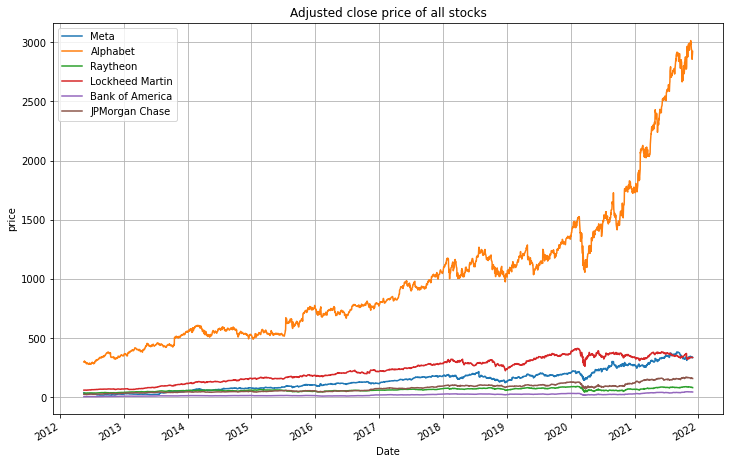

In [3]:
# plot del graifco, specificando i parametri necessari
adj_close_tot["Meta Price"].plot(figsize=(12,8), grid=True, label="Meta")
adj_close_tot["Alphabet Price"].plot(figsize=(12,8), grid=True, label="Alphabet")
adj_close_tot["Raytheon Price"].plot(figsize=(12,8), grid=True, label="Raytheon")
adj_close_tot["Lockheed Martin Price"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")
adj_close_tot["Bank of America Price"].plot(figsize=(12,8), grid=True, label="Bank of America")
adj_close_tot["JPMorgan Chase Price"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper left") # per mostrare la legenda in alto a sx
plt.title("Adjusted close price of all stocks") # titolo del grafico
plt.ylabel("price") # titolo della asse y (non determinato automaticamente)
plt.show()

## 2. Statistiche descrittive

### 2.1 Rendimenti semplici e composti

#### Titoli tecnologici

Tabella dei rendimenti semplici Netti e Lordi

In [4]:
# Raggruppamento dei dati con media
fb_group = fb_df.groupby(pd.Grouper(freq='M')).mean()
goog_group = goog_df.groupby(pd.Grouper(freq='M')).mean()

fb_month_returns = fb_group[['Adj Close']]
goog_month_returns = goog_group[['Adj Close']]
rendimenti_tecno = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per meta (FB)
rendimenti_netti_fb = np.log(fb_month_returns/fb_month_returns.shift(1))
rendimenti_lordi_fb = np.log(rendimenti_netti_fb + 1)

# Calcoli dei rendimenti netti e lordi per goog
rendimenti_netti_goog = np.log(goog_month_returns/goog_month_returns.shift(1))
rendimenti_lordi_goog = np.log(rendimenti_netti_goog + 1)

rendimenti_tecno["Rendimenti Netti Meta"] = rendimenti_netti_fb
rendimenti_tecno["Rendimenti Lordi Meta"] = rendimenti_lordi_fb
rendimenti_tecno["Rendimenti Netti Alphabet"] = rendimenti_netti_goog
rendimenti_tecno["Rendimenti Lordi Alphabet"] = rendimenti_lordi_goog
rendimenti_tecno = rendimenti_tecno.dropna()

rendimenti_tecno

,Rendimenti Netti Meta,Rendimenti Lordi Meta,Rendimenti Netti Alphabet,Rendimenti Lordi Alphabet
Date,,,,
2012-06-30,-0.075904,-0.078939,-0.059138,-0.060959
2012-07-31,-0.022612,-0.022872,0.043593,0.042669
2012-08-31,-0.362019,-0.449446,0.105718,0.100495
2012-09-30,0.025514,0.025194,0.080848,0.077746
2012-10-31,-0.000406,-0.000406,0.010737,0.010680
...,...,...,...,...
2021-07-31,0.049158,0.047988,0.056498,0.054959
2021-08-31,0.026913,0.026557,0.051407,0.050129
2021-09-30,0.002614,0.002611,0.018219,0.018055


Grafico a Linee dei rendimenti semplici netti

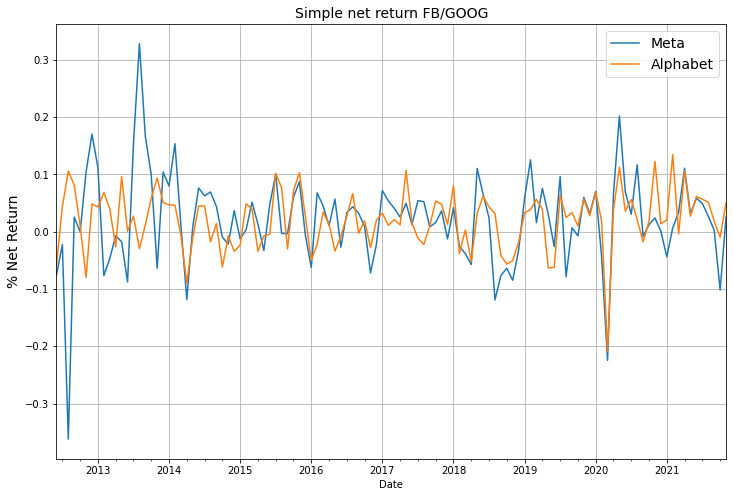

In [5]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_tecno["Rendimenti Netti Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Netti Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper right", fontsize=14)
plt.ylabel("% Net Return", fontsize=14)
plt.title("Simple net return FB/GOOG", fontsize=14)
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [6]:
# Rendimenti composti per Meta (FB)
cumul_daily_return_fb = (1 + rendimenti_netti_fb).cumprod()
rendimenti_tecno["Rendimenti Compositi Meta"] = cumul_daily_return_fb

# Rendimenti composti per Alphabet (GOOG)
cumul_daily_return_goog = (1 + rendimenti_netti_goog).cumprod()
rendimenti_tecno["Rendimenti Compositi Alphabet"] = cumul_daily_return_goog

# Costruzione tabella con titoli colonne
rendimenti_tecno[["Rendimenti Compositi Meta", "Rendimenti Compositi Alphabet"]]

,Rendimenti Compositi Meta,Rendimenti Compositi Alphabet
Date,,
2012-06-30,0.924096,0.960711
2012-07-31,0.903201,1.002591
2012-08-31,0.576225,1.108583
2012-09-30,0.590927,1.198210
2012-10-31,0.590687,1.211075
...,...,...
2021-07-31,7.487620,7.603153
2021-08-31,7.689137,7.994008
2021-09-30,7.709239,8.139652


Grafico dei rendimenti composti

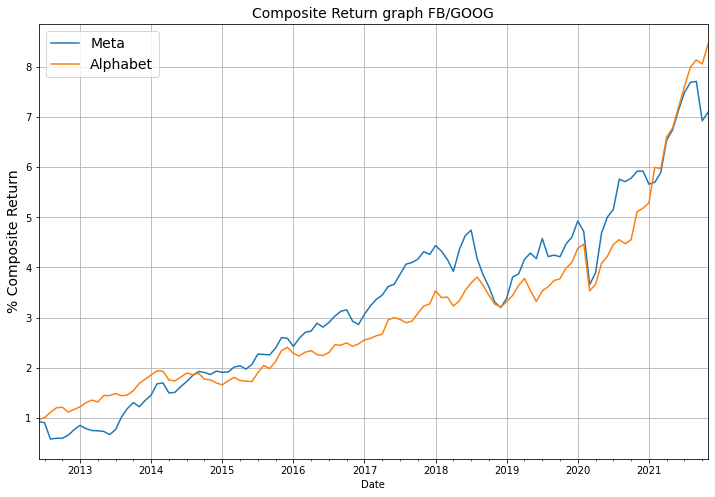

In [7]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli
rendimenti_tecno["Rendimenti Compositi Meta"].plot(figsize=(12,8), grid=True, label="Meta")
rendimenti_tecno["Rendimenti Compositi Alphabet"].plot(figsize=(12,8), grid=True, label="Alphabet")

plt.legend(loc="upper left", fontsize=14)
plt.ylabel("% Composite Return", fontsize=14)
plt.title("Composite Return graph FB/GOOG", fontsize=14)
plt.show()

#### Commenti aggiuntivi su titoli tecnologici

Confronto sulle serie storiche di FB e GOOG per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di GOOG e FB
2. Tabella con indice correlazione

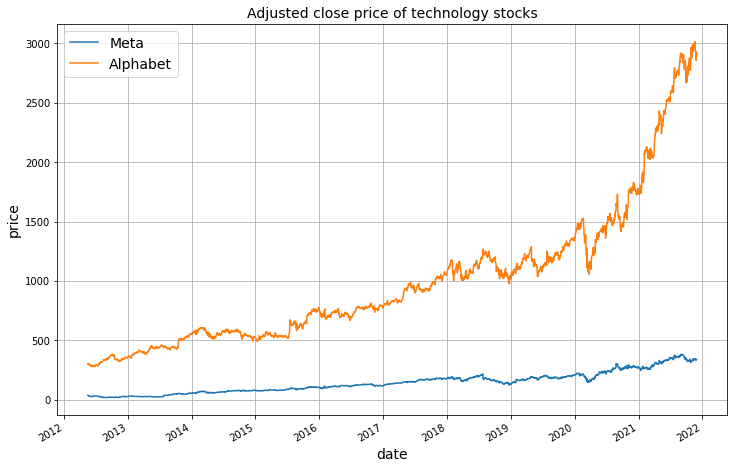

In [8]:
# Creiamo un nuovo dataframe per isolare il prezzo di GOOG e FB
adj_close_tecno = pd.DataFrame()

adj_close_tecno["Meta Price"] = fb_df[["Adj Close"]]
adj_close_tecno["Alphabet Price"] = goog_df[["Adj Close"]]

adj_close_tecno["Meta Price"].plot(figsize=(12,8), grid=True, label="Meta")
adj_close_tecno["Alphabet Price"].plot(figsize=(12,8), grid=True, label="Alphabet")
plt.title("Adjusted close price of technology stocks", fontsize=14) # titolo del grafico
plt.legend(loc="upper left", fontsize=14)
plt.ylabel("price", fontsize=14) # titolo della asse y (non determinato automaticamente)
plt.xlabel("date", fontsize=14)
plt.show()

In [9]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_tecno.corr()

,Meta Price,Alphabet Price
Meta Price,1.000000,0.962272
Alphabet Price,0.962272,1.000000


#### Titoli militari

Tabella dei rendimenti semplici Netti e Lordi per RTX e LMT

In [10]:
# Raggruppamento dei dati con media
rtx_group = rtx_df.groupby(pd.Grouper(freq='M')).mean()
lmt_group = lmt_df.groupby(pd.Grouper(freq='M')).mean()

rtx_month_returns = rtx_group[['Adj Close']]
lmt_month_returns = lmt_group[['Adj Close']]
rendimenti_mil = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per Raytheon (RTX)
rendimenti_netti_rtx = np.log(rtx_month_returns/rtx_month_returns.shift(1))
rendimenti_lordi_rtx = np.log(rendimenti_netti_rtx + 1)

# Calcoli dei rendimenti netti e lordi per Lockheed Martin (LMT)
rendimenti_netti_lmt = np.log(lmt_month_returns/lmt_month_returns.shift(1))
rendimenti_lordi_lmt = np.log(rendimenti_netti_lmt + 1)

rendimenti_mil["Rendimenti Netti Raytheon"] = rendimenti_netti_rtx
rendimenti_mil["Rendimenti Lordi Raytheon"] = rendimenti_lordi_rtx
rendimenti_mil["Rendimenti Netti Lockheed Martin"] = rendimenti_netti_lmt
rendimenti_mil["Rendimenti Lordi Lockheed Martin"] = rendimenti_lordi_lmt
rendimenti_mil = rendimenti_mil.dropna()

rendimenti_mil

,Rendimenti Netti Raytheon,Rendimenti Lordi Raytheon,Rendimenti Netti Lockheed Martin,Rendimenti Lordi Lockheed Martin
Date,,,,
2011-12-31,-0.005293,-0.005307,0.016011,0.015884
2012-01-31,0.027827,0.027447,0.038575,0.037850
2012-02-29,0.082457,0.079234,0.066358,0.064249
2012-03-31,0.012832,0.012750,0.034661,0.034074
2012-04-30,-0.034980,-0.035606,0.010139,0.010088
...,...,...,...,...
2021-07-31,-0.022304,-0.022557,-0.016970,-0.017116
2021-08-31,0.007073,0.007048,-0.045274,-0.046331
2021-09-30,-0.015047,-0.015162,-0.030881,-0.031368


Grafico a Linee dei rendimenti semplici netti

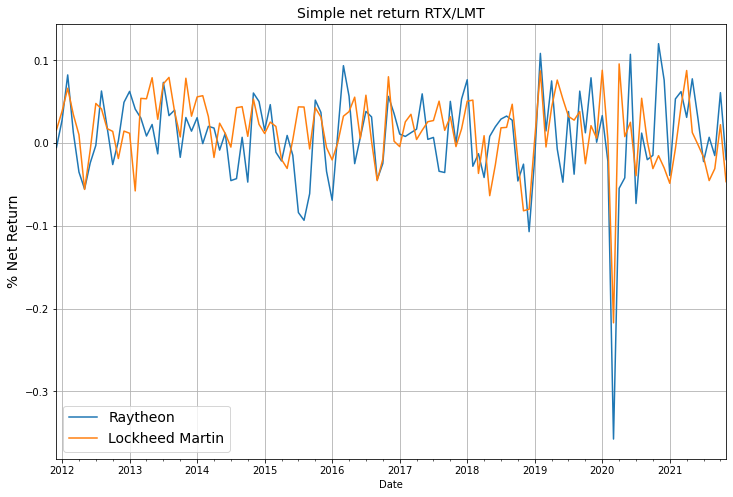

In [11]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_mil["Rendimenti Netti Raytheon"].plot(figsize=(12,8), grid=True, label="Raytheon")
rendimenti_mil["Rendimenti Netti Lockheed Martin"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")

plt.legend(loc="lower left", fontsize=14)
plt.ylabel("% Net Return", fontsize=14)
plt.title("Simple net return RTX/LMT", fontsize=14)
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [12]:
# Rendimenti composti per Raytheon (RTX)
cumul_daily_return_rtx = (1 + rendimenti_netti_rtx).cumprod()
rendimenti_mil["Rendimenti Compositi Raytheon"] = cumul_daily_return_rtx

# Rendimenti composti per Lockheed Martin (LMT)
cumul_daily_return_lmt = (1 + rendimenti_netti_lmt).cumprod()
rendimenti_mil["Rendimenti Compositi Lockheed Martin"] = cumul_daily_return_lmt

# Costruzione tabella con titoli colonne
rendimenti_mil[["Rendimenti Compositi Raytheon", "Rendimenti Compositi Lockheed Martin"]]

,Rendimenti Compositi Raytheon,Rendimenti Compositi Lockheed Martin
Date,,
2011-12-31,0.994707,1.016011
2012-01-31,1.022387,1.055204
2012-02-29,1.106690,1.125225
2012-03-31,1.120891,1.164226
2012-04-30,1.081683,1.176030
...,...,...
2021-07-31,1.868969,5.815330
2021-08-31,1.882187,5.552044
2021-09-30,1.853865,5.380590


Grafico dei rendimenti composti

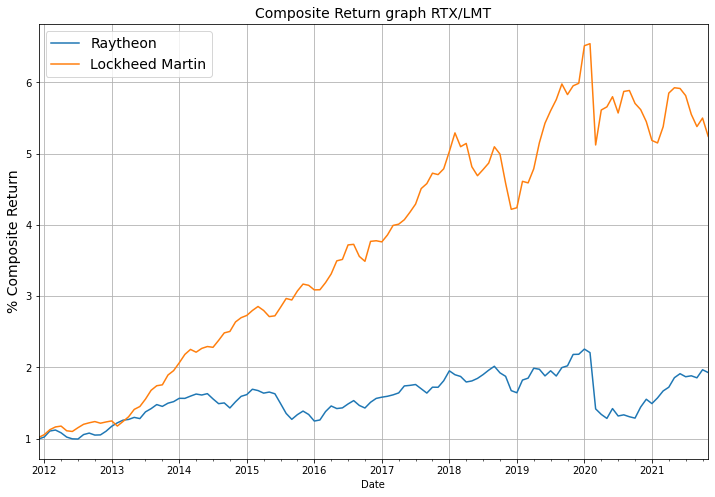

In [13]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli LMT/RTX
rendimenti_mil["Rendimenti Compositi Raytheon"].plot(figsize=(12,8), grid=True, label="Raytheon")
rendimenti_mil["Rendimenti Compositi Lockheed Martin"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")

plt.legend(loc="upper left", fontsize=14)
plt.ylabel("% Composite Return", fontsize=14)
plt.title("Composite Return graph RTX/LMT", fontsize=14)
plt.show()

#### Commenti aggiuntivi su titoli militari

Confronto sulle serie storiche di RTX e LMT per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di RTX e LMT
2. Tabella con indice correlazione

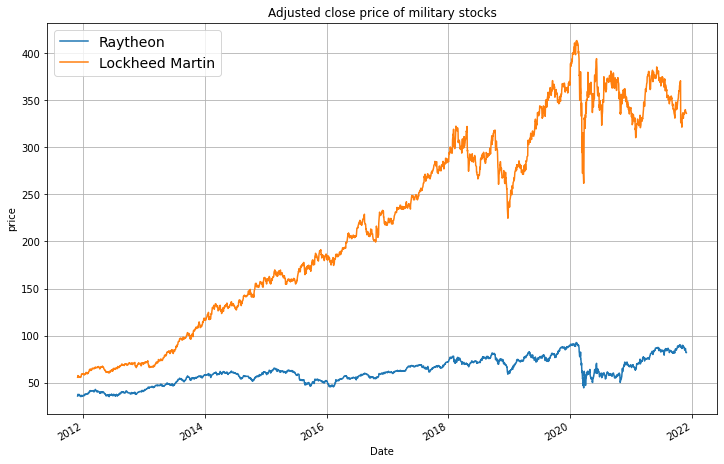

In [14]:
# Creiamo un nuovo dataframe per isolare il prezzo di RTX e LMT
adj_close_mil = pd.DataFrame()

adj_close_mil["Raytheon Price"] = rtx_df[["Adj Close"]]
adj_close_mil["Lockheed Martin Price"] = lmt_df[["Adj Close"]]

adj_close_mil["Raytheon Price"].plot(figsize=(12,8), grid=True, label="Raytheon")
adj_close_mil["Lockheed Martin Price"].plot(figsize=(12,8), grid=True, label="Lockheed Martin")
plt.legend(loc="upper left", fontsize=14)
plt.title("Adjusted close price of military stocks") # titolo del grafico
plt.ylabel("price") # titolo della asse y (non determinato automaticamente)
plt.show()

In [15]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_mil.corr()

,Raytheon Price,Lockheed Martin Price
Raytheon Price,1.000000,0.836831
Lockheed Martin Price,0.836831,1.000000


#### Titoli bancari

Tabella dei rendimenti semplici Netti e Lordi per BAC e JPM

In [16]:
# Raggruppamento dei dati con media
bac_group = bac_df.groupby(pd.Grouper(freq='M')).mean()
jpm_group = jpm_df.groupby(pd.Grouper(freq='M')).mean()

bac_month_returns = bac_group[['Adj Close']]
jpm_month_returns = jpm_group[['Adj Close']]
rendimenti_banc = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per Bank of America (BAC)
rendimenti_netti_bac = np.log(bac_month_returns/bac_month_returns.shift(1))
rendimenti_lordi_bac = np.log(rendimenti_netti_bac + 1)

# Calcoli dei rendimenti netti e lordi per JPMorgan Chase (JPM)
rendimenti_netti_jpm = np.log(jpm_month_returns/jpm_month_returns.shift(1))
rendimenti_lordi_jpm = np.log(rendimenti_netti_jpm + 1)

rendimenti_banc["Rendimenti Netti Bank of America"] = rendimenti_netti_bac
rendimenti_banc["Rendimenti Lordi Bank of America"] = rendimenti_lordi_bac
rendimenti_banc["Rendimenti Netti JPMorgan Chase"] = rendimenti_netti_jpm
rendimenti_banc["Rendimenti Lordi JPMorgan Chase"] = rendimenti_lordi_jpm
rendimenti_banc = rendimenti_banc.dropna()

rendimenti_banc

,Rendimenti Netti Bank of America,Rendimenti Lordi Bank of America,Rendimenti Netti JPMorgan Chase,Rendimenti Lordi JPMorgan Chase
Date,,,,
2011-12-31,0.038181,0.037471,0.087203,0.083609
2012-01-31,0.214105,0.194007,0.122811,0.115835
2012-02-29,0.162144,0.150267,0.046805,0.045743
2012-03-31,0.121862,0.114989,0.126862,0.119437
2012-04-30,-0.026216,-0.026565,0.014923,0.014813
...,...,...,...,...
2021-07-31,-0.063906,-0.066039,-0.024773,-0.025085
2021-08-31,0.047449,0.046358,0.029489,0.029063
2021-09-30,0.011157,0.011095,0.013406,0.013317


Grafico a Linee dei rendimenti semplici netti

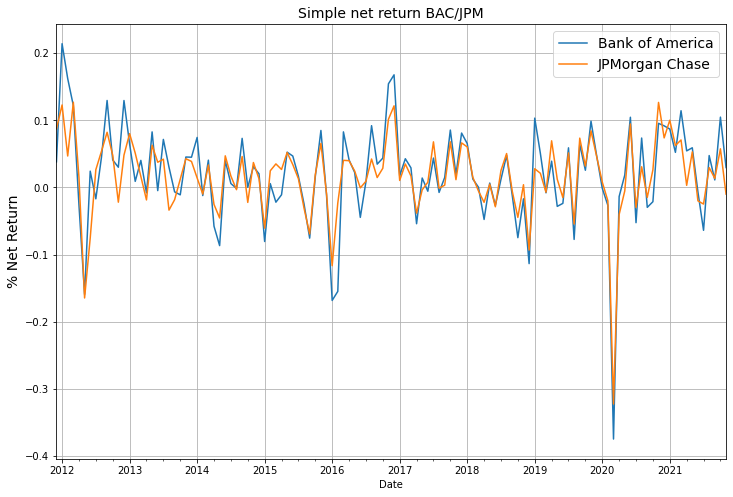

In [26]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_banc["Rendimenti Netti Bank of America"].plot(figsize=(12,8), grid=True, label="Bank of America")
rendimenti_banc["Rendimenti Netti JPMorgan Chase"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper right", fontsize=14)
plt.ylabel("% Net Return", fontsize=14)
plt.title("Simple net return BAC/JPM", fontsize=14)
plt.show()

#### Rendimenti composti
Tabella dei rendimenti composti

In [18]:
# Rendimenti composti per Bank of America (BAC)
cumul_daily_return_bac = (1 + rendimenti_netti_bac).cumprod()
rendimenti_banc["Rendimenti Compositi Bank of America"] = cumul_daily_return_bac

# Rendimenti composti per JPMorgan Chase (JPM)
cumul_daily_return_jpm = (1 + rendimenti_netti_jpm).cumprod()
rendimenti_banc["Rendimenti Compositi JPMorgan Chase"] = cumul_daily_return_jpm

# Costruzione tabella con titoli colonne
rendimenti_banc[["Rendimenti Compositi Bank of America", "Rendimenti Compositi JPMorgan Chase"]]

,Rendimenti Compositi Bank of America,Rendimenti Compositi JPMorgan Chase
Date,,
2011-12-31,1.038181,1.087203
2012-01-31,1.260461,1.220724
2012-02-29,1.464838,1.277859
2012-03-31,1.643346,1.439971
2012-04-30,1.600264,1.461460
...,...,...
2021-07-31,5.974823,5.404685
2021-08-31,6.258324,5.564067
2021-09-30,6.328147,5.638657


Grafico dei rendimenti composti

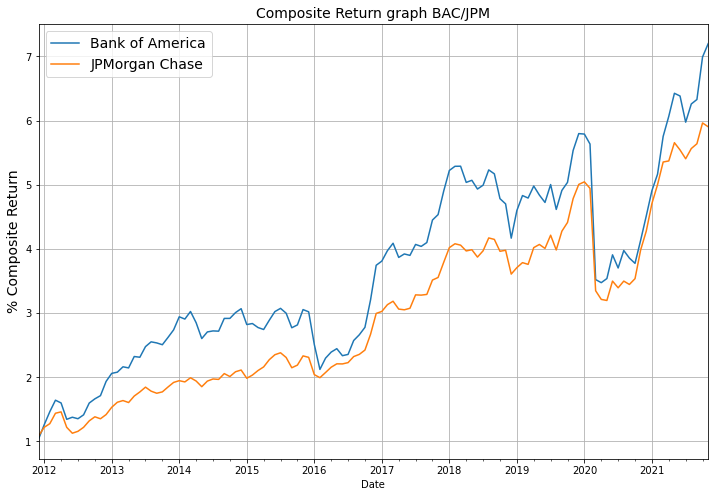

In [27]:
# Plot del grafico dei rendimenti compositi, con i rispettivi titoli BAC/JPM
rendimenti_banc["Rendimenti Compositi Bank of America"].plot(figsize=(12,8), grid=True, label="Bank of America")
rendimenti_banc["Rendimenti Compositi JPMorgan Chase"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")

plt.legend(loc="upper left", fontsize=14)
plt.ylabel("% Composite Return", fontsize=14)
plt.title("Composite Return graph BAC/JPM", fontsize=14)
plt.show()

#### Commenti aggiuntivi su titoli bancari

Confronto sulle serie storiche di BAC e JPM per identificare una possibile correlazione, creando le seguenti grafiche:
1. Grafico isolato sul prezzo di BAC e JPM
2. Tabella con indice correlazione

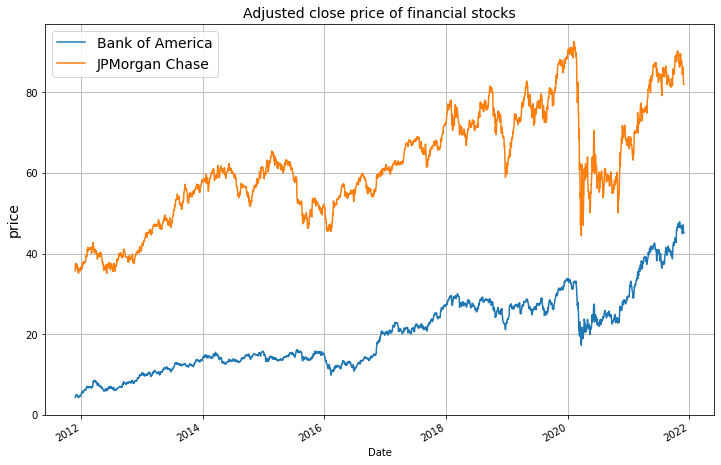

In [29]:
# Creiamo un nuovo dataframe per isolare il prezzo di BAC e JPM
adj_close_banc = pd.DataFrame()

adj_close_banc["Bank of America Price"] = bac_df[["Adj Close"]]
adj_close_banc["JPMorgan Chase Price"] = rtx_df[["Adj Close"]]

adj_close_banc["Bank of America Price"].plot(figsize=(12,8), grid=True, label="Bank of America")
adj_close_banc["JPMorgan Chase Price"].plot(figsize=(12,8), grid=True, label="JPMorgan Chase")
plt.legend(loc="upper left", fontsize=14)
plt.title("Adjusted close price of financial stocks", fontsize=14) # titolo del grafico
plt.ylabel("price", fontsize=14) # titolo della asse y (non determinato automaticamente)
plt.show()

In [21]:
# Calcoliamo ora la correlazione utilizzando la funzione interna di pandas
adj_close_banc.corr()

,Bank of America Price,JPMorgan Chase Price
Bank of America Price,1.000000,0.909522
JPMorgan Chase Price,0.909522,1.000000


### 2.2 Istogramma dei rendimenti e dispersione

#### settore tecnologico (FB e GOOG)

Istogramma per ritorno netto

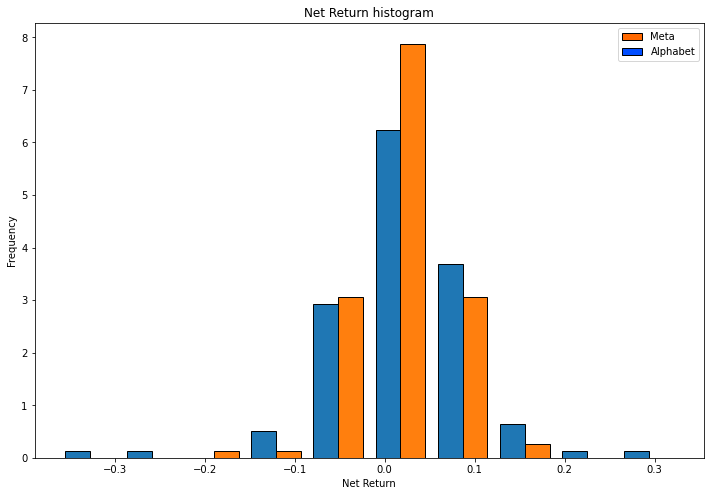

In [22]:
# Plot dell'istogramma dei rendimenti usando sempre matplotlib
from matplotlib.patches import Rectangle # per la legenda ci serve rectangle

cmap = plt.get_cmap('jet')


plt.figure(figsize=(12,8)) # hist non ha come argomento la grandezza della figura, workaround
plt.hist(rendimenti_tecno[["Rendimenti Netti Meta", "Rendimenti Netti Alphabet"]], density=True, edgecolor='black')
plt.title("Net Return histogram")
t_labels=["Meta", "Alphabet"] # Nomi degli stock nella legenda
t_handles=[Rectangle((0,0),1,1,color=cmap(0.8),ec="k"), Rectangle((0,0),1,1,color=cmap(0.2),ec="k")]
plt.legend(t_handles, t_labels, loc='upper right') # Creazione legenda con posizione alto a dx
plt.xlabel("Net Return")
plt.ylabel("Frequency")


plt.show()

#### Dispersione rendimenti (FB e GOOG)

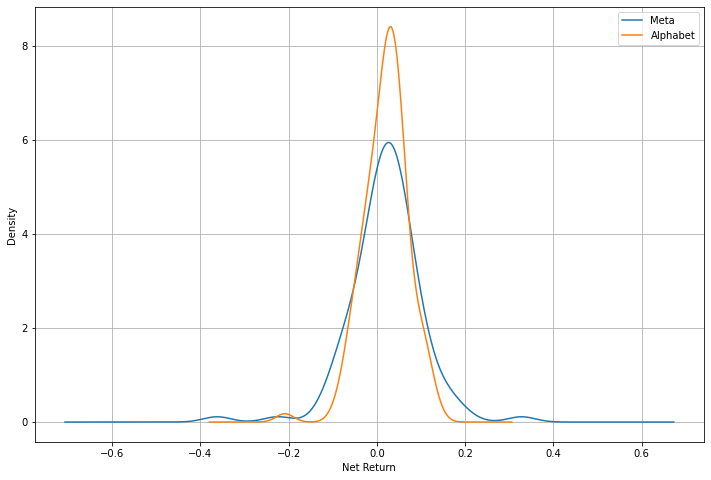

Deviazione Standard


Rendimenti Netti Meta        0.080678
Rendimenti Netti Alphabet    0.050795
dtype: float64

In [23]:
# Plot della dispersione dei rendimenti
rendimenti_tecno["Rendimenti Netti Meta"].plot.density(label="Meta", grid=True, figsize=(12,8),)
rendimenti_tecno["Rendimenti Netti Alphabet"].plot.density(label="Alphabet", grid=True, figsize=(12,8),)
plt.legend(loc="upper right")
plt.xlabel("Net Return")

plt.show()

# Stampiamo la deviazione standard per entrambi i titoli
print("Deviazione Standard")
rendimenti_tecno[["Rendimenti Netti Meta", "Rendimenti Netti Alphabet"]].std()

### 2.3 Grafici Diagnostici a 4 sezioni

I grafici richiesti per questa sezione sono:
- istogramma
- kernel density
- boxplot
- qq-plot

Iniziamo con **Meta (FB)**

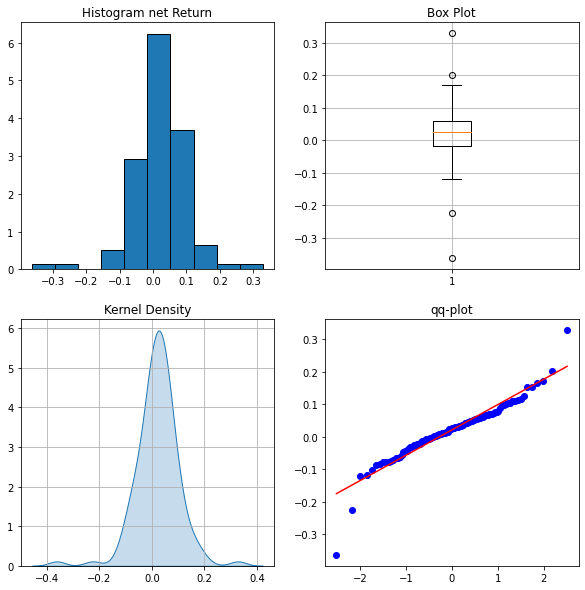

In [24]:
# Effettuiamo per la prima volta il plot di 3 grafici nella stessa immagine
from scipy import stats # importiamo stats dalla libreria scipy

rendimenti_netti_fb = rendimenti_netti_fb.dropna() # drop delle righe vuote (meta quotata solo da 2012)

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_fb["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_fb["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_fb["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_fb["Adj Close"],dist='norm',plot=plt)
plt.title("qq-plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()

Ora per **Alphabet (GOOG)**

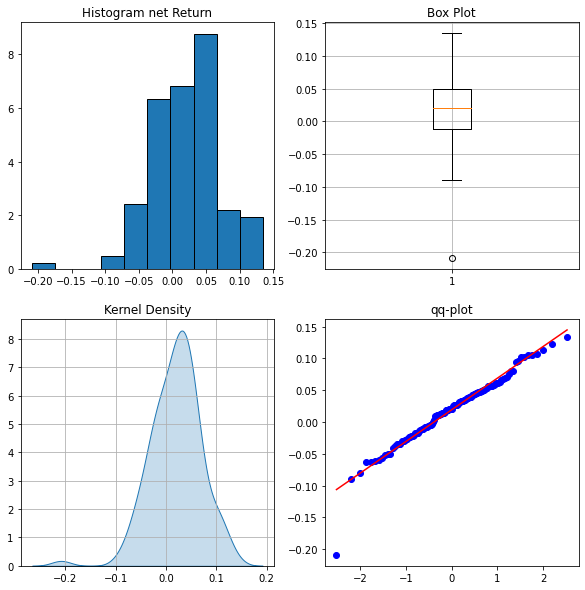

In [25]:
# Plot dei grafici diagnostici per Alphabet
rendimenti_netti_goog = rendimenti_netti_goog.dropna()

plt.figure(figsize=(10,10))
plt.rc('font', size=10)

# Utiliziamo subplot per effettuare più plot nella stessa pic.
## Istogramma
plt.subplot(221)
plt.title("Histogram net Return")
plt.hist(rendimenti_netti_goog["Adj Close"], density = True, edgecolor='black')

## BoxPlot
plt.subplot(222)
plt.title("Box Plot")
plt.grid(True)
plt.boxplot(rendimenti_netti_goog["Adj Close"])

## Kernel Density
plt.subplot(223)
plt.title("Kernel Density")
sns.kdeplot(rendimenti_netti_goog["Adj Close"], shade=True)
plt.grid(True)
plt.xlabel('') 
plt.ylabel('')

## qq-plot
plt.subplot(224)
stats.probplot(rendimenti_netti_goog["Adj Close"],dist='norm',plot=plt)
plt.title("qq-plot")
plt.xlabel('') 
plt.ylabel('')

plt.show()